Import libraries

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Read in data

In [171]:
research_data = pd.read_csv('drug200.csv')


Check data format

In [172]:
research_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Check data information

In [173]:
research_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Create input and output data for model

In [174]:
X = research_data.drop('Drug', axis = 'columns') # creates input dataset 
y = research_data['Drug'] # creates output dataset 



Encode data columns so that all data is numeric

In [175]:
from sklearn.preprocessing import LabelEncoder

In [176]:
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_cholesterol = LabelEncoder()

In [177]:
X['sex_n'] = le_sex.fit_transform(X['Sex']) # adds the encoded sex column
X['bp_n'] = le_sex.fit_transform(X['BP'])   # adds the encoded BP column
X['cholesterol_n'] = le_sex.fit_transform(X['Cholesterol'])  # adds the encoded Cholesterol column
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K,sex_n,bp_n,cholesterol_n
0,23,F,HIGH,HIGH,25.355,0,0,0
1,47,M,LOW,HIGH,13.093,1,1,0
2,47,M,LOW,HIGH,10.114,1,1,0
3,28,F,NORMAL,HIGH,7.798,0,2,0
4,61,F,LOW,HIGH,18.043,0,1,0


Encoded patient feature key:

Sex
M = 1
F = 0

Blood Pressure
High = 0
Low = 1
Normal = 2

Cholesterol
High = 0
Normal = 1

In [178]:
X_n = X.drop(['Sex','BP','Cholesterol'],axis='columns') # drops the nonencoded (string) feature columns
X_n.head()

,Age,Na_to_K,sex_n,bp_n,cholesterol_n
0,23,25.355,0,0,0
1,47,13.093,1,1,0
2,47,10.114,1,1,0
3,28,7.798,0,2,0
4,61,18.043,0,1,0


Visualize patient feature correlation by examining scatter plots

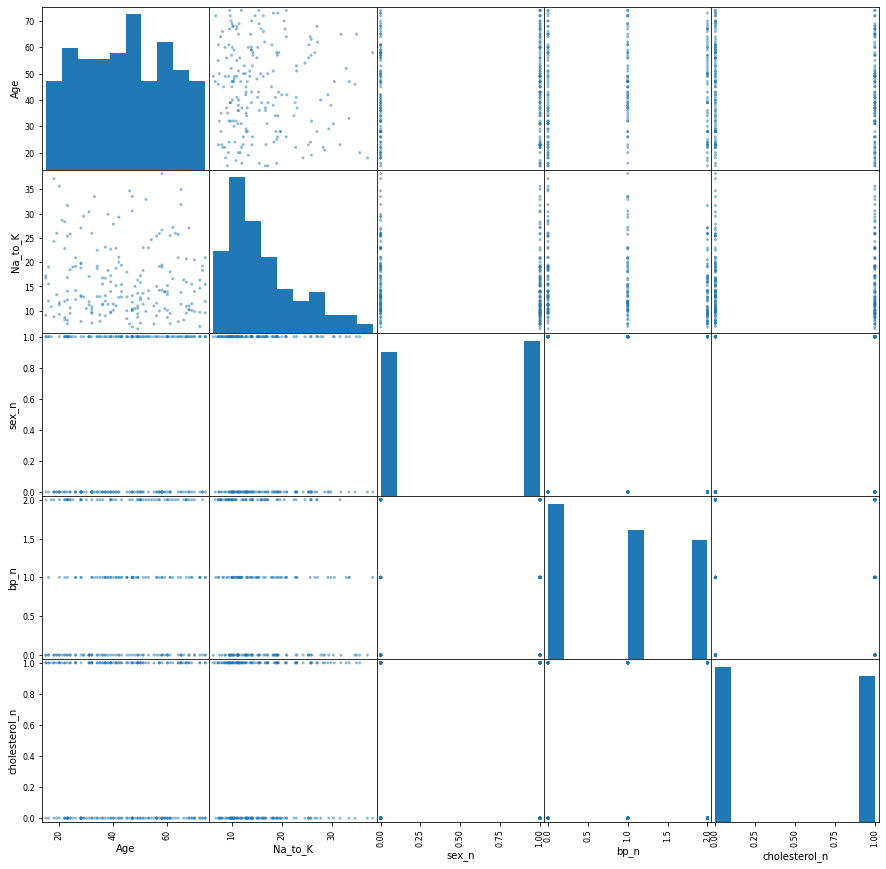

In [179]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_n, figsize=(15,15))
plt.show()

Visualize patient feature distribution by examining histograms  

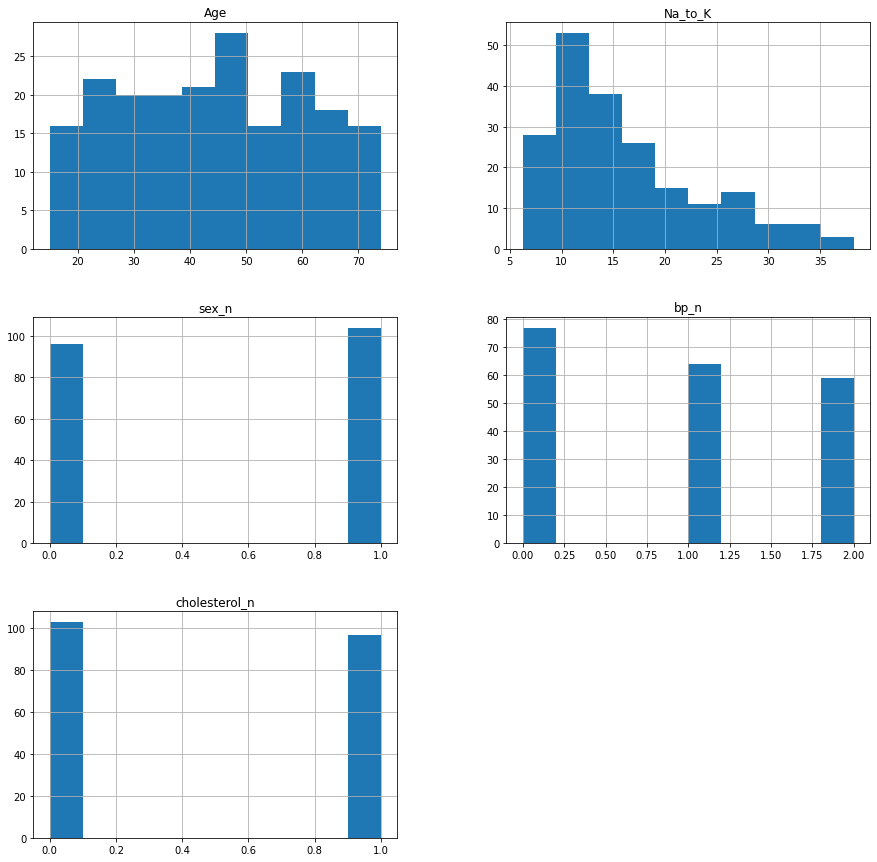

In [180]:
X_n.hist(figsize=(15,15))
plt.show()

Visualize drug distribution by examining histogram

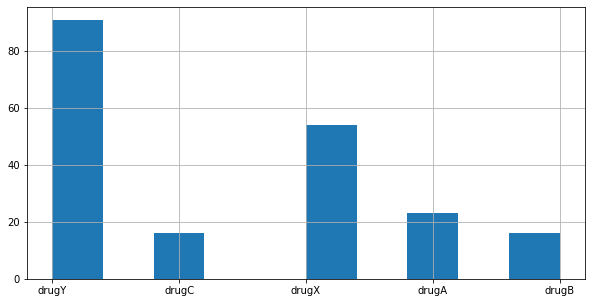

In [181]:
y.hist(figsize=(10,5))
plt.show()

Split data into training and test data

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=.2) # creates training and test data split
X_train.shape, X_test.shape

((160, 5), (40, 5))

Train model using DecisionTreeClassifier

In [183]:
model = DecisionTreeClassifier()
model.fit(X_train.values, y_train.values)


DecisionTreeClassifier()

Test model to determine accuracy

In [184]:
predictions = model.predict(X_test.values) # predicts output based on given input
score = accuracy_score(y_test, predictions) # score determined by comparing the test data results to the model predictions
score

0.95

Visualize the decision tree model 

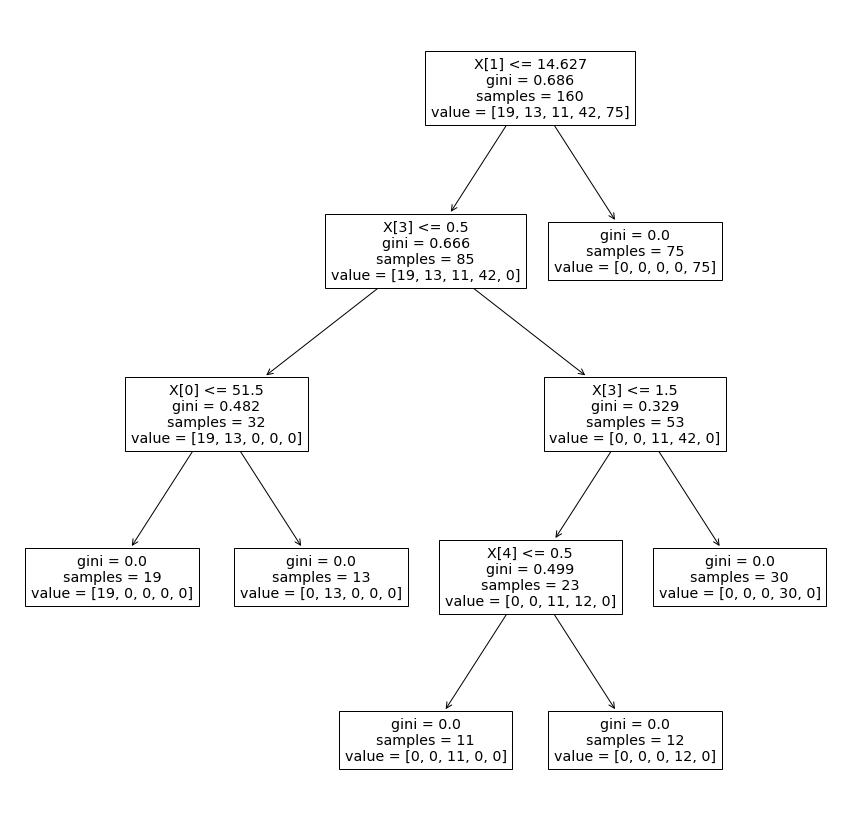

In [185]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model)
plt.show()

Predict the best drug for a new patient with the following conditions:
Age = 35, Na_to_K = 10.000, sex = 1, BP = 2, Cholesterol = 0  

In [186]:
prediction = model.predict([ [35,10.000,1,2,0] ]) 
prediction[0]

'drugX'

Predict the best drug prescription for new patients based on the entered patient information

In [ ]:
def findMed(): 
    while True:
        age = input('Age: ')
        Na_to_k = input('Na_to_k: ')
        sex = input('Sex (Enter "1" for Male or "0" for Female): ')
        bp = input('BP (Enter "0" for HIGH, "1" for LOW, or "2" for Normal): ')
        cholesterol = input('Cholesterol (Enter "0" for High or "1" for Normal): ')

        prediction = model.predict([ [age, Na_to_k, sex, bp, cholesterol] ]) 
        print('The best prescription for this patient is: ' + prediction[0])
        repeat = input('Would you like to try again for another patient? Enter "Y" or "N": ')
        if (repeat != "Y"):
            break
try: 
    findMed()
except:
    print("An error occurred. Please be sure to enter valid information.")
